In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import mean_squared_error
import numpy as np
%matplotlib inline #This is to avoid writing plt.show()

UsageError: unrecognized arguments: #This is to avoid writing plt.show()


In [27]:
shampoo = pd.read_csv('C:/Users/srija/Desktop/shampoo.csv')
type(shampoo)

pandas.core.frame.DataFrame

In [28]:
shampoo = pd.read_csv('C:/Users/srija/Desktop/shampoo.csv',index_col=[0],parse_dates=True,squeeze=True)
type(shampoo)

pandas.core.series.Series

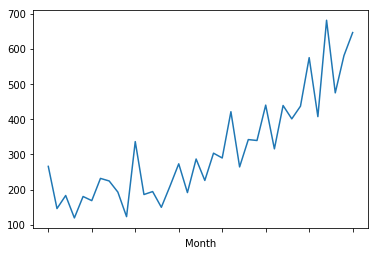

In [29]:
shampoo.plot()

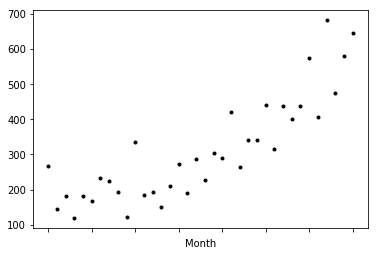

In [30]:
shampoo.plot(style = 'k.')

10 Day moving average

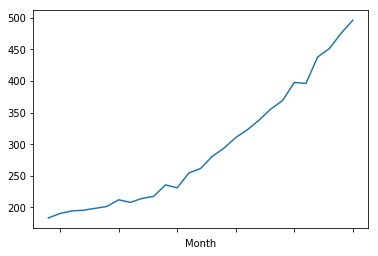

In [32]:
shampoo_10 = shampoo.rolling(window = 10).mean()
shampoo_10.plot()

Creation of base line model (also known as naive, starting model)

It is the most basic model which a user can define

The assumption behind this is previous value is the best reflector of next value

In [34]:
shampoo_base = pd.concat([shampoo, shampoo.shift(1)], axis=1)
shampoo_base.head()

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


Changing name of the columns

shampoo_base.dropna() will not change shampoo_base, so inplace=True is used as parameter

In [38]:
shampoo_base.columns = ['Actual', 'Forecast']
shampoo_base.dropna(inplace=True)
shampoo_base.head()

,Actual,Forecast
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [42]:
error = mean_squared_error(shampoo_base.Actual, shampoo_base.Forecast)
np.sqrt(error)

108.23764726616282

ARIMA(p,d,q)

plot_acf: q 
plot_pacf: p

acf curve is for moving average

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

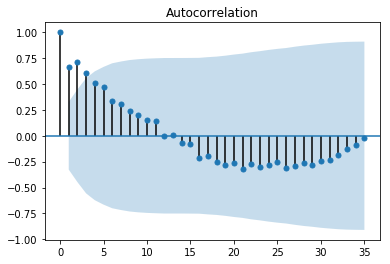

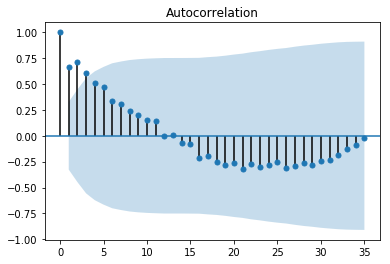

In [44]:
plot_acf(shampoo)

Q = 3 as 3rd previ term is going below the critical  range

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


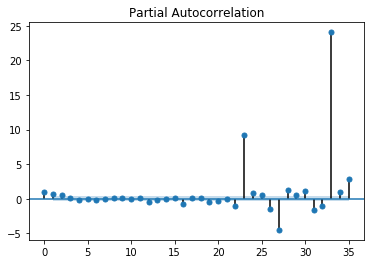

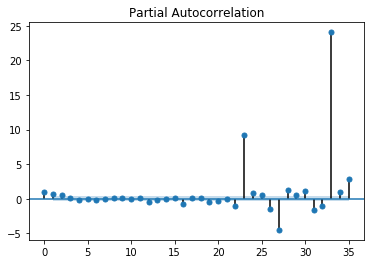

In [46]:
plot_pacf(shampoo)

P = 2 as 2nd previ term is going below the critical  range
D is generally  between  0-2
It makes the series STATIONARY by removing trend and seasonality factor
this helps in better prediction

In [47]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36]

shampoo_model = ARIMA(shampoo_train, order=(3,1,2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [53]:
shampoo_model_fit = shampoo_model.fit()

In [55]:
shampoo_model_fit.aic

272.38919480713037

In [57]:
shampoo_forecast = shampoo_model_fit.forecast(steps=11)[0]
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

130.92713917809232

In [58]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,q,d)
            train, test = shampoo[0:25], shampoo[25:36]
            predictions=list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMA %s MSE= %.2f'% (order,error))
                except:
                    continue
                
            

ARIMA (0, 0, 0) RMSE= 77950.15
ARIMA (0, 1, 0) RMSE= 33849.87
ARIMA (0, 2, 0) RMSE= 34017.03
ARIMA (0, 0, 1) RMSE= 70119.28
ARIMA (0, 1, 1) RMSE= 40654.02
ARIMA (0, 2, 1) RMSE= 28392.48
ARIMA (0, 0, 2) RMSE= 58566.48
ARIMA (0, 1, 2) RMSE= 34511.83
ARIMA (1, 0, 0) RMSE= 61158.70
ARIMA (1, 1, 0) RMSE= 31687.07
ARIMA (1, 2, 0) RMSE= 18845.84
ARIMA (1, 0, 1) RMSE= 46528.76
ARIMA (1, 1, 1) RMSE= 42176.68
ARIMA (1, 2, 1) RMSE= 26129.56
ARIMA (1, 0, 2) RMSE= 43922.40
ARIMA (2, 0, 0) RMSE= 45248.48
ARIMA (2, 1, 0) RMSE= 35488.30
ARIMA (2, 2, 0) RMSE= 34024.29
ARIMA (2, 1, 1) RMSE= 39633.97
ARIMA (2, 1, 2) RMSE= 35884.79
ARIMA (3, 0, 0) RMSE= 46326.09
ARIMA (3, 1, 0) RMSE= 22024.88
ARIMA (3, 2, 0) RMSE= 24695.30
ARIMA (3, 1, 1) RMSE= 22841.65
ARIMA (3, 2, 1) RMSE= 16368.69
ARIMA (3, 1, 2) RMSE= 18095.38
ARIMA (3, 2, 2) RMSE= 15804.24
ARIMA (4, 1, 0) RMSE= 22339.38
ARIMA (4, 2, 0) RMSE= 20052.26
ARIMA (4, 0, 1) RMSE= 28339.17
ARIMA (4, 1, 1) RMSE= 22615.98
ARIMA (4, 2, 1) RMSE= 15572.78
ARIMA (4